# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | David | Ebede | David Ebede | 3 | 25 |
| Member 2: | Htike Htike | Htoo | Htike Htike Htoo | 3 | 25 |
| Member 3: | May Thinzar | Khine | May Thinzar Khine | 3 | 25 |
| Member 4: | Su Mun | Thet | Su Mun Thet | 3 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

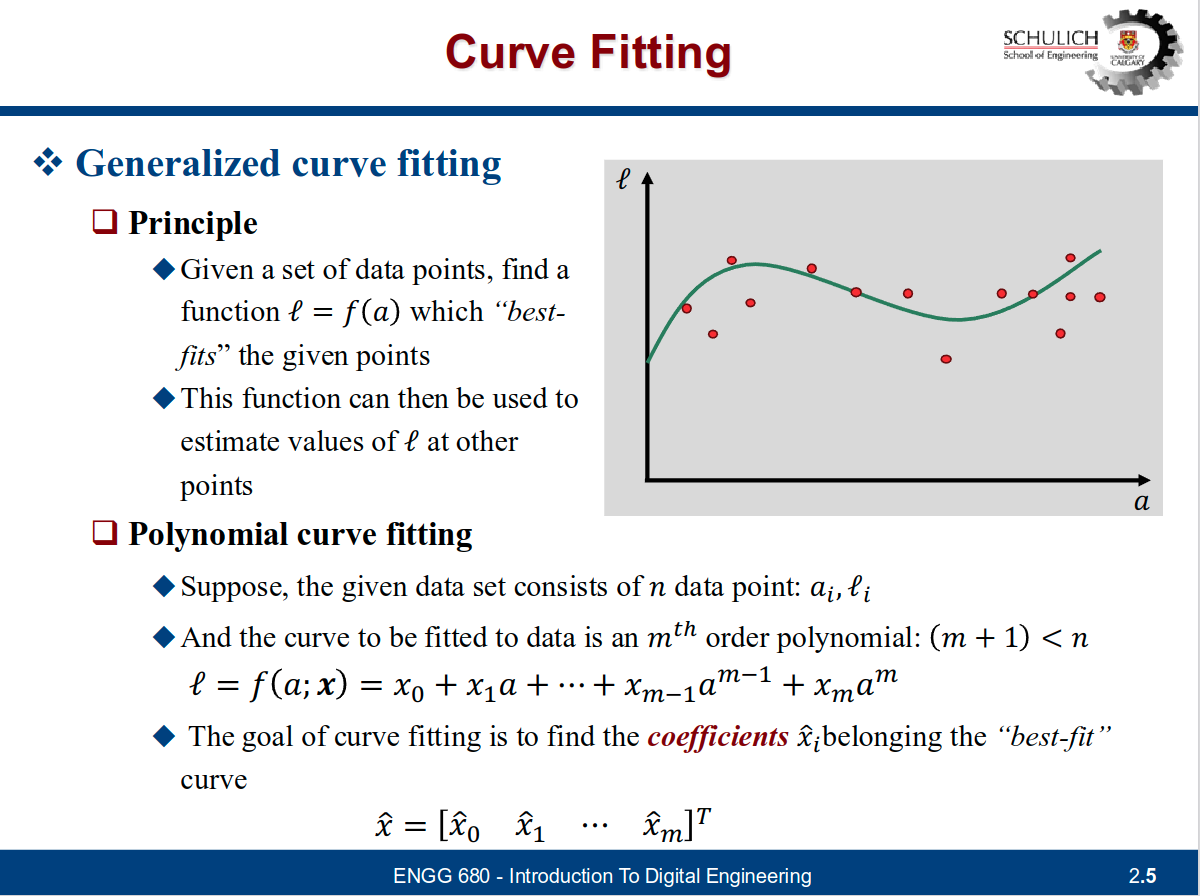

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [2]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = #...
arr_data = #...

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = #...
l_var = #...
l_true = #...

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
file_path = '/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/data.xlsx'
df_data = pd.read_excel(file_path)
arr_data = df_data.to_numpy()

In [6]:
l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true = arr_data[:, 2]

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = #...

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = #...

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


In [ ]:
# Step 3
import numpy as np
n = len(l)
P = np.eye(n)
start = -1 * np.pi
end = np.pi
a = np.linspace(start, end, n)

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# ...

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

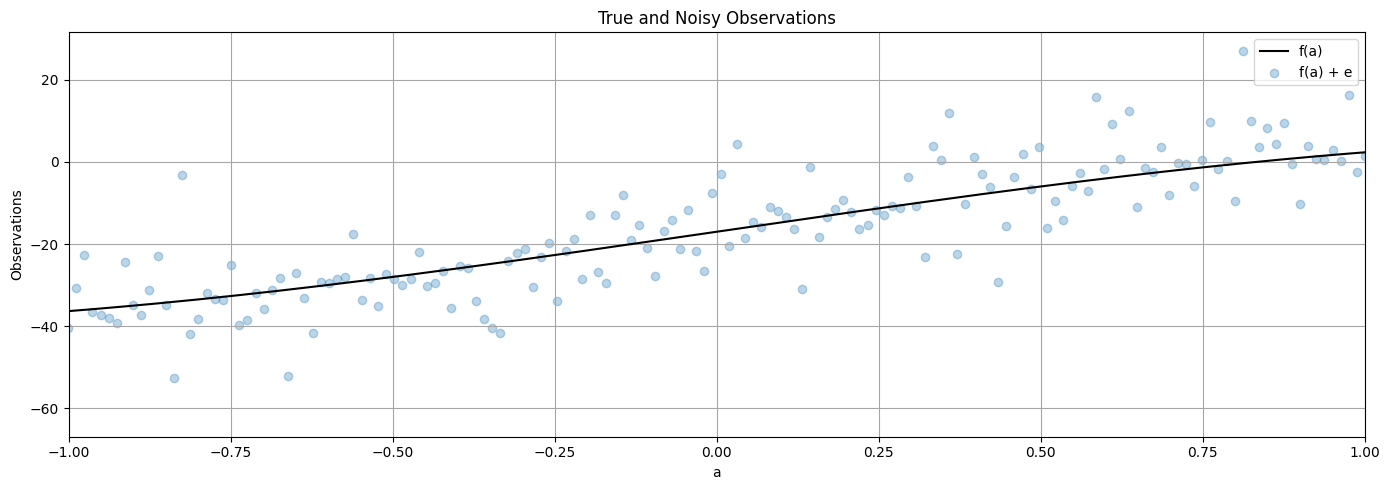

In [ ]:
# Step 4

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label="f(a)", color='k')
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)  # Noisy observations
ax.set_xlabel("a")
ax.set_ylabel("Observations")
ax.set_title("True and Noisy Observations")
ax.set_xlim([-1, 1])
ax.legend()
ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

  #...
  return (x, cov_x, apv, v)

In [ ]:
def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posteriori variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Step 1: Create the design matrix for polynomial fitting
    # The design matrix will contain powers of a up to the specified degree
    A = np.vander(a, deg + 1, increasing=True)  # Vandermonde matrix for polynomial fitting

    # Step 2: Calculate the weighted least squares estimate
    # Solve for x in the normal equation: (A^T * P * A) * x = A^T * P * l
    A_T = A.T  # Transpose of the design matrix
    # Compute the normal equations
    A_T_P_A = A_T @ P @ A  # A^T * P * A
    A_T_P_l = A_T @ P @ l  # A^T * P * l

    # Step 3: Calculate the polynomial coefficients x
    x = np.linalg.solve(A_T_P_A, A_T_P_l)  # Solve for x

    # Step 4: Calculate the residuals v (differences between observed and fitted values)
    v = l - A @ x  # Residuals: l - f(a)

    # Step 5: Calculate the covariance of the estimated coefficients
    # Estimate the covariance matrix of the coefficients
    cov_x = np.linalg.inv(A_T_P_A) * (np.sum(v**2) / (len(l) - (deg + 1)))  # Adjusted for degrees of freedom

    # Step 6: Calculate the a posteriori variance factor (goodness of fit)
    apv = np.sum(v**2) / (len(l) - (deg + 1))  # Variance of residuals

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...


In [ ]:
# Step 6: Call the fit_polynomial_curve function and fetch the results
degrees = [1, 3, 5]  # Polynomial degrees to test
results = {}  # Dictionary to store results for each degree

for deg in degrees:
    # Call the fitting function
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    # Store results in the dictionary
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'a_posteriori_variance': apv,
        'residuals': v
    }


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = #...
cubic_uw = #...
quintic_uw = #...

In [ ]:
# Step 7
line_uw = np.polyval(results[1]['coefficients'][::-1], a)
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a)

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# ...


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

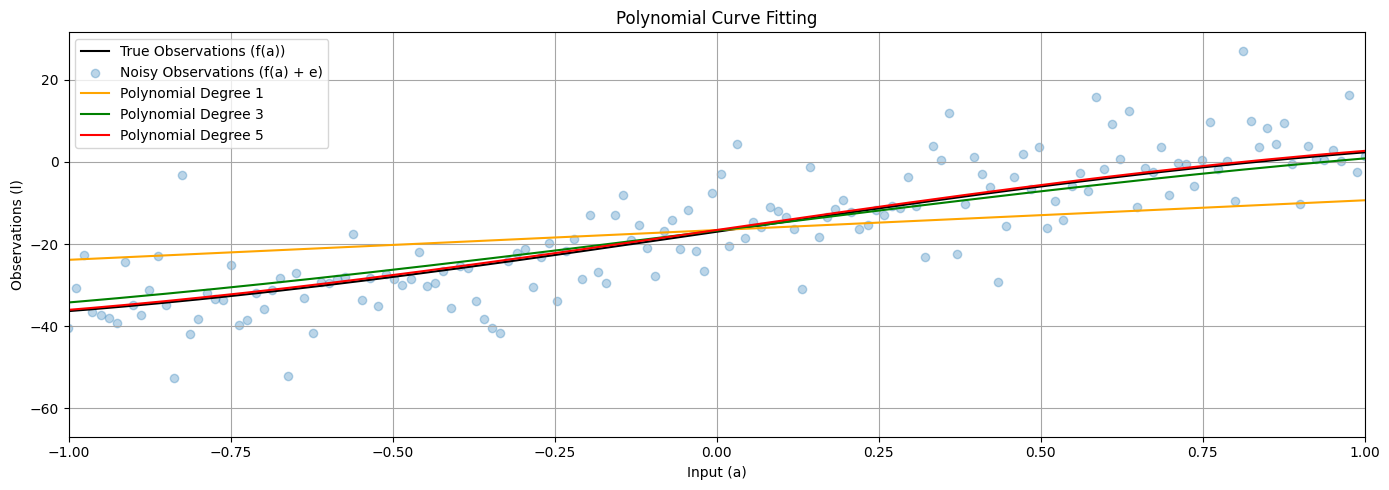

In [ ]:
# Step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label='True Observations (f(a))', color='k')
ax.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, line_uw, label='Polynomial Degree 1', color='orange')  # Linear fit
ax.plot(a, cubic_uw, label='Polynomial Degree 3', color='green')  # Cubic fit
ax.plot(a, quintic_uw, label='Polynomial Degree 5', color='red')  # Quintic fit
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations (l)')
ax.set_title('Polynomial Curve Fitting')
ax.set_xlim(-1, 1)
ax.grid(True, which='both', ls='-', color='0.65')
ax.legend()
fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...


In [ ]:
# Step 9: Print the a posteriori variance factor for each polynomial function
print("A Posteriori Variance Factors:")
for deg in degrees:
    apv = results[deg]['a_posteriori_variance']
    print(f"Degree {deg}: A Posteriori Variance Factor = {apv:.4f}")

A Posteriori Variance Factors:
Degree 1: A Posteriori Variance Factor = 162.7426
Degree 3: A Posteriori Variance Factor = 66.1323
Degree 5: A Posteriori Variance Factor = 63.7583


In [ ]:
# step 10
# please compute the L2-norm between the predicted and true observations and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...

In [ ]:
# Step 10: Compute the L2-norm between the predicted and true observations
print("L2-norm between Predicted and True Observations:")
for deg in degrees:
    # Predicted observations from the polynomial function
    predicted = np.polyval(results[deg]['coefficients'][::-1], a)

    # Compute L2-norm (Euclidean distance)
    l2_norm = np.linalg.norm(predicted - l_true)

    print(f"Degree {deg}: L2-norm = {l2_norm:.4f}")

L2-norm between Predicted and True Observations:
Degree 1: L2-norm = 229.0602
Degree 3: L2-norm = 38.2860
Degree 5: L2-norm = 17.3700


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...


In [ ]:
# step 11
print("The results shows that as the degree of the polynomial increases, both the a posteriori variance factor tends to decrease, and the L2-norm reflects a closer fit to the true observations.")
print("But, while higher-degree polynomials may provide better fits to the data, they also risk overfitting, especially if the underlying function does not require such complexity.")
print("Therefore, a balance must be struck between model complexity and performance.")


The results shows that as the degree of the polynomial increases, both the a posteriori variance factor tends to decrease, and the L2-norm reflects a closer fit to the true observations.
But, while higher-degree polynomials may provide better fits to the data, they also risk overfitting, especially if the underlying function does not require such complexity.
Therefore, a balance must be struck between model complexity and performance.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = #...

In [ ]:
# Step 12
# Define the P matrix using the variance of observations l_var
P = np.diag(1 / l_var)

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...


A Posteriori Variance Factors with Proper Weights:
Degree 1: A Posteriori Variance Factor = 162.7426
Degree 3: A Posteriori Variance Factor = 66.1323
Degree 5: A Posteriori Variance Factor = 63.7583
L2-norm between Predicted and True Observations with Proper Weights:
Degree 1: L2-norm = 558.6778
Degree 3: L2-norm = 600.0148
Degree 5: L2-norm = 601.1012


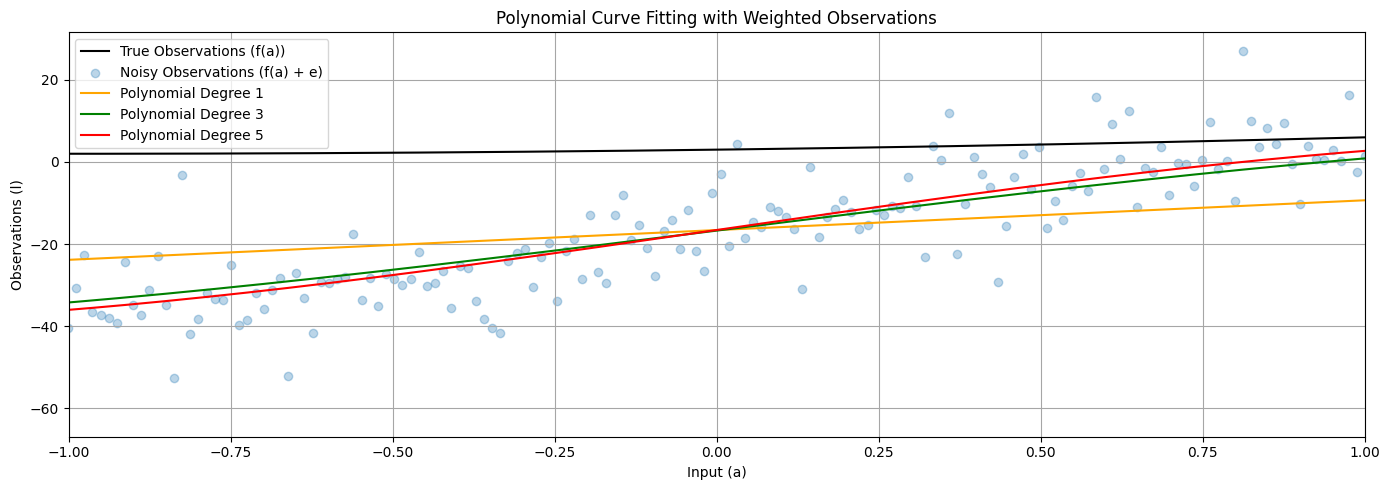

In [ ]:
#step 13 : Repeating the steps 6-10, using proper P matrix

# Step 6
results_weighted = {}

# Fit for polynomial degrees of 1, 3, and 5
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results_weighted[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'a_posteriori_variance': apv,
        'residuals': v
    }

# Step 7
line_uw_weighted = np.polyval(results_weighted[1]['coefficients'][::-1], a)    # Polynomial of degree 1
cubic_uw_weighted = np.polyval(results_weighted[3]['coefficients'][::-1], a)  # Polynomial of degree 3
quintic_uw_weighted = np.polyval(results_weighted[5]['coefficients'][::-1], a) # Polynomial of degree 5

# Step 8
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
ax.plot(a, l_true, label='True Observations (f(a))', color='k')
ax.scatter(a, l, label='Noisy Observations (f(a) + e)', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, line_uw_weighted, label='Polynomial Degree 1', color='orange')  # Linear fit
ax.plot(a, cubic_uw_weighted, label='Polynomial Degree 3', color='green')  # Cubic fit
ax.plot(a, quintic_uw_weighted, label='Polynomial Degree 5', color='red')  # Quintic fit
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations (l)')
ax.set_title('Polynomial Curve Fitting with Weighted Observations')
ax.set_xlim(-1, 1)
ax.grid(True, which='both', ls='-', color='0.65')
ax.legend()
fig.tight_layout()

# Step 9
print("A Posteriori Variance Factors with Proper Weights:")
for deg in degrees:
    apv = results_weighted[deg]['a_posteriori_variance']
    print(f"Degree {deg}: A Posteriori Variance Factor = {apv:.4f}")

# Step 10: Compute the L2-norm between the predicted and true observations
print("L2-norm between Predicted and True Observations with Proper Weights:")
for deg in degrees:
    predicted = np.polyval(results_weighted[deg]['coefficients'][::-1], a)
    l2_norm = np.linalg.norm(predicted - l_true)

    print(f"Degree {deg}: L2-norm = {l2_norm:.4f}")

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

In [ ]:
#Step 14: Comparison of Results

print("Weighted LSE provides a more accurate fit to true observations by down-weighting noisy data points, leading to lower a posteriori variance factors and L2-norms compared to unweighted LSE.")
print("Weighted LSE accounts for varying observation reliability, improving model performance. By reducing the influence of high-variance observations, it enhances estimation accuracy and robustness against noise, unlike unweighted LSE, which treats all data equally and may lead to overfitting")



Weighted LSE provides a more accurate fit to true observations by down-weighting noisy data points, leading to lower a posteriori variance factors and L2-norms compared to unweighted LSE.
Weighted LSE accounts for varying observation reliability, improving model performance. By reducing the influence of high-variance observations, it enhances estimation accuracy and robustness against noise, unlike unweighted LSE, which treats all data equally and may lead to overfitting


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

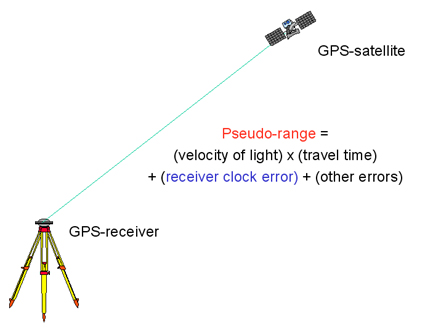

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = #...
df_sat_pos = #...

pseudorange = #...
sat_pos = #...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#step 1
import pandas as pd
import numpy as np
file_path = '/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx'
satellite_position = '/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx'
df_pseudorange = pd.read_excel(file_path)  # Adjust the filename as necessary
df_sat_pos = pd.read_excel(satellite_position)  # Adjust the filename as necessary
pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = #...
m = #...

In [ ]:
#step 2
n = pseudorange.shape[0]
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = #...

In [ ]:
#step 3
variance = 1  # given variance in m^2
n = pseudorange.shape[0]
P = np.eye(n) / variance

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = #...

In [ ]:
# Step 4
m = 4
x_0 = np.zeros(m)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
#step 5
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = #...
i = #...
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# Step 6
m = 4
delta = np.ones(m)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# Step 7
import numpy as np
def euclidean_norm(receiver_pos, satellite_pos):
    # Calculate the differences between receiver and satellite positions
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)

    return distance

In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# Step 8:
import numpy as np
def design_matrix(r_pos, s_pos, rho):
    n = s_pos.shape[0]
    A = np.zeros((n, 4))
    for i in range(n):
        A[i, 0] = (s_pos[i, 0] - r_pos[0]) / rho[i]
        A[i, 1] = (s_pos[i, 1] - r_pos[1]) / rho[i]
        A[i, 2] = (s_pos[i, 2] - r_pos[2]) / rho[i]
        A[i, 3] = 1
    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# Step 9
threshold = 0.001
max_iterations = 1000
i = 0

while np.linalg.norm(delta[:3]) > threshold and i < max_iterations:
    rho = euclidean_norm(x_hat[:3], sat_pos)
    A = design_matrix(x_hat[:3], sat_pos, rho)
    w = pseudorange - (rho + x_hat[3])
    delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

    x_hat += delta
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    i += 1

    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

apv = (w.T @ P @ w) / (n - m)

C_x_hat = np.linalg.inv(A.T @ P @ A)

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# Step 10

print("LSE Convergence Results:")
print("-------------------------")
print("Estimated States (x_hat):")
print(x_hat)

print("\nCorrections Array (delta):")
print(delta)

print("\nEstimated Measurements Residuals (w):")
print(w)

print("\nA Posteriori Variance of Unit Weight (APV):")
print(apv)

print("\nCovariance Matrix of Estimated States (C_x_hat):")
print(C_x_hat)

print("\nNumber of Iterations to Convergence:")
print(i)

print("\n3-D Position Errors:")
print(err_pos)


LSE Convergence Results:
-------------------------
Estimated States (x_hat):
[ 1.51951187e+08 -4.06712817e+08 -2.42581427e+08 -4.97343137e+08]

Corrections Array (delta):
[ 1.80292377e-06  1.03033157e-05 -9.15527344e-06 -4.57763672e-06]

Estimated Measurements Residuals (w):
[-8.58306885e-06 -6.79492950e-06 -8.58306885e-06]

A Posteriori Variance of Unit Weight (APV):
2.764417266527224e-11

Covariance Matrix of Estimated States (C_x_hat):
[[ 6.85246185e+14  3.67244503e+14 -1.69207894e+15 -7.34357852e+14]
 [ 5.79556197e+14 -2.61637693e+15 -5.64737096e+14 -2.59211966e+15]
 [-1.74425128e+15  0.00000000e+00  4.50359963e+15  2.72956543e+15]
 [-5.86182809e+14 -2.25179981e+15  2.25179981e+15 -5.64036761e+14]]

Number of Iterations to Convergence:
0

3-D Position Errors:
[ 1.51951177e+08 -4.06712827e+08 -2.42581437e+08]


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
#step 11

print("A Posteriori Cariance of Unit Weight value: it reflects the alignment between the observed measurements (pseudoranges) and the calculated geometric distances. A lower APV indicates more accurate parameter estimation. Since the APV is small, it suggests high accuracy in the estimations, with minor residuals. This implies that the positioning model used in the least squares estimation is effectively suited for the data.")
print("Covariance Matrix of Estimated States (C_x_hat): it suggests that there is substantial uncertainty in the position estimates. Addressing this uncertainty through improved measurement strategies or additional data could enhance the overall reliability of the positioning system.")


A Posteriori Cariance of Unit Weight value: it reflects the alignment between the observed measurements (pseudoranges) and the calculated geometric distances. A lower APV indicates more accurate parameter estimation. Since the APV is small, it suggests high accuracy in the estimations, with minor residuals. This implies that the positioning model used in the least squares estimation is effectively suited for the data.
Covariance Matrix of Estimated States (C_x_hat): it suggests that there is substantial uncertainty in the position estimates. Addressing this uncertainty through improved measurement strategies or additional data could enhance the overall reliability of the positioning system.


In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

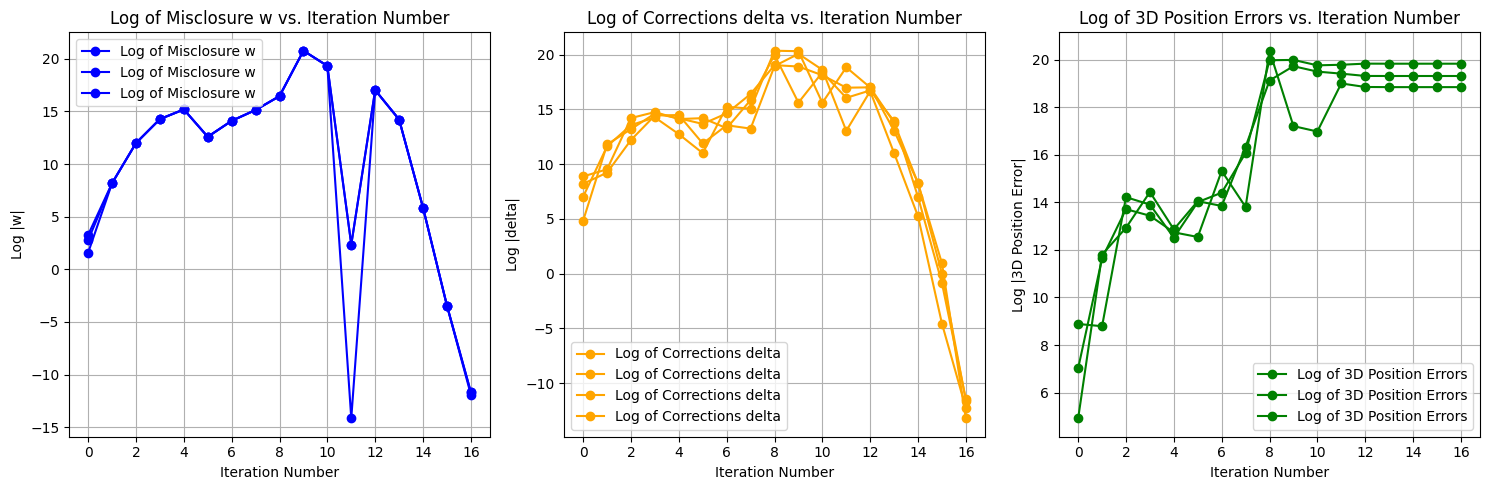

In [ ]:
# Step 12
import matplotlib.pyplot as plt
#1. Plot log of the misclosure w against the LSQ iteration number i
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(arr_i, np.log(np.abs(arr_w)), marker='o', label='Log of Misclosure w', color='blue')
plt.title('Log of Misclosure w vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log |w|')
plt.grid(True)
plt.legend()

#2. Plot log of the corrections delta against the LSQ iteration number i
plt.subplot(1, 3, 2)
plt.plot(arr_i, np.log(np.abs(arr_delta)), marker='o', label='Log of Corrections delta', color='orange')
plt.title('Log of Corrections delta vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log |delta|')
plt.grid(True)
plt.legend()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
plt.subplot(1, 3, 3)
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), marker='o', label='Log of 3D Position Errors', color='green')
plt.title('Log of 3D Position Errors vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log |3D Position Error|')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
#step 13
print("The log of misclosure shows a rapid decrease of curve initially, indicating effective convergence towards the true position, followed by a plateau, suggesting diminishing returns as the algorithm refines the solution.")
print("The log of corrections shows a sharp decline early on, reflecting significant adjustments in the estimated position. The later gradual decrease indicates smaller, more precise adjustments as the algorithm approaches convergence.")
print("The log of position errors shows a steady decline, reinforcing the convergence of the estimated states to the ground truth. The error reduction becomes minimal in later iterations, suggesting that the algorithm has stabilized around an accurate position estimate.")





The log of misclosure shows a rapid decrease of curve initially, indicating effective convergence towards the true position, followed by a plateau, suggesting diminishing returns as the algorithm refines the solution.
The log of corrections shows a sharp decline early on, reflecting significant adjustments in the estimated position. The later gradual decrease indicates smaller, more precise adjustments as the algorithm approaches convergence.
The log of position errors shows a steady decline, reinforcing the convergence of the estimated states to the ground truth. The error reduction becomes minimal in later iterations, suggesting that the algorithm has stabilized around an accurate position estimate.


In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!

In [ ]:
#29degree 11’35.2”N 69degree30’50.1"W